# FAKE NEWS DETECTION

### 1)  PROBLEM STATEMENT :-

To build a model to accurately classify a piece of news as REAL or FAKE.
Using sklearn,  build a TfidfVectorizer on the provided dataset. Then, initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.


### 2) DATA COLLECTION :-

The zip folder of the dataset can be found in the same repo as this file.


### 3) ANALYZING DATA :-

Exploring the data 

In [3]:
import pandas as pd

# news_df is a dataframe

news_df = pd.read_csv('news.csv')
news_df


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
#To get an overview of the data -> (rows,columns)
news_df.shape

(6335, 4)

#### Analysing the dataset for unbiased data

In [8]:
news = news_df['label'].value_counts()
news

REAL    3171
FAKE    3164
Name: label, dtype: int64

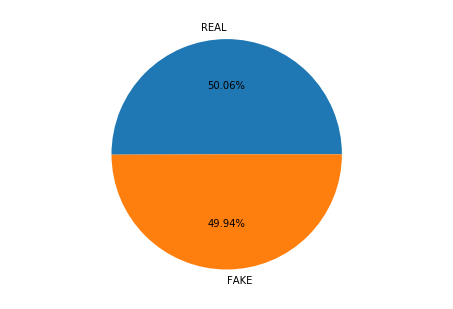

In [12]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
values = ['REAL','FAKE']
ax.pie(news, labels = values,autopct='%1.2f%%')
plt.show()

From the results above we can conclude that the data we are using is unbiased as the distribution is almost equal between the possible two values 'REAL' and 'FAKE'.
Hence, we can now split this data into training and test data.

### 4) DATA MODELLING

#### We need to split the data into training data and testing data. For this I have used Scikit Learn. The split ratio is 
#### Training data -> 75%
#### Testing data -> 25%

In [14]:
labels= news_df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [26]:
# Splitting the dataset
import itertools
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( news_df['text'], labels, test_size = 0.25, random_state = 5 )

In [27]:
X_train.head()

5924    Videos 30 Civilians Die In US Airstrike Called...
5773    Next Prev Swipe left/right A lawyer explains h...
5068    Complaining about Western “hysteria” surroundi...
431     In a jobs report that may influence the Federa...
4440    BY PATRICK MARTIN 5 November 2016 A New York T...
Name: text, dtype: object

In [28]:
Y_train.head()

5924    FAKE
5773    FAKE
5068    FAKE
431     REAL
4440    FAKE
Name: label, dtype: object

### Initialising a tfidf vectoriser

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words ='english', max_df = 0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)  # fit and transform X_train
tfidf_test = tfidf_vectorizer.transform(X_test)    #transform X_test

In [32]:
tfidf_train.shape    #(rows,columns)

(4751, 59366)

In [33]:
tfidf_test.shape

(1584, 59366)

In [39]:
print(tfidf_test)

  (0, 58447)	0.03538615601737031
  (0, 57949)	0.10564051574601091
  (0, 57941)	0.059091152921199847
  (0, 56927)	0.15168596218824293
  (0, 55130)	0.08151061548672175
  (0, 53775)	0.08101393951781721
  (0, 53525)	0.07278718781464638
  (0, 52987)	0.030487758158882036
  (0, 52793)	0.07677397447277234
  (0, 50420)	0.05472731165856779
  (0, 49591)	0.06475008278109214
  (0, 47493)	0.07416053098925282
  (0, 47339)	0.09738070903057125
  (0, 47336)	0.14865832094717824
  (0, 47322)	0.07263225064200096
  (0, 46847)	0.08053050983291084
  (0, 46289)	0.04609275222250982
  (0, 46281)	0.03774754339692854
  (0, 45894)	0.1391209097474325
  (0, 45863)	0.026880979268703843
  (0, 45452)	0.09484716899113149
  (0, 44906)	0.03819206363650201
  (0, 43867)	0.1386544190779238
  (0, 41749)	0.06245476447533761
  (0, 41305)	0.0904380021005156
  :	:
  (1583, 8045)	0.0538459631429192
  (1583, 7994)	0.054951498975149546
  (1583, 7988)	0.035034379845997894
  (1583, 7440)	0.06991136042327177
  (1583, 6819)	0.04770305306

### 5) PREDICTION AND ACCURACY

#### A PassiveAggressiveClassifier is used for predicition.

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier 
pac = PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,Y_train)
Y_pred = pac.predict(tfidf_test)

#### Accuracy and Confusion Matrix 

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
score=accuracy_score(Y_test,Y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.51%


In [37]:
confusion_matrix(Y_test,Y_pred, labels=['FAKE','REAL'])

array([[747,  42],
       [ 45, 750]], dtype=int64)